**Why do we expect short reads to produce a more fragmented assembly than long reads?**     
Short reads are length of 50 to 150 nucleotides whereas long reads are length of 10 to 15 kb. Therefore more short reads are needed to map the entire genome.     

**Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?**       
Amplifying long reads (generating more copies of long reads) is error-prone than amplifying short reads because DNA polymerase tends to become destabilize as it moves forward.


## Generate assembly statistics

### Terminal

**spades -t 1 -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -o spades_output**    


**use 'screen'**     
ctrl-a c #creating windows      
ctrl-a d #detach from screen     
screen -r 12157 #reattach to screen
ctrl-a M #getting alerts

### Result from *assembly-stats*:

**assembly-stats contigs.fasta**        
> stats for contigs.fasta    
sum = 6678635, n = 176, ave = 37946.79, largest = 414008     
N50 = 234690, n = 11     
N60 = 202142, n = 14     
N70 = 154232, n = 18     
N80 = 103367, n = 23     
N90 = 81286, n = 30    
N100 = 128, n = 176    
N_count = 0    
Gaps = 0     


**assembly-stats scaffolds.fasta**
> stats for scaffolds.fasta     
sum = 6678655, n = 174, ave = 38383.07, largest = 414008     
N50 = 234690, n = 11     
N60 = 202142, n = 14     
N70 = 154232, n = 18    
N80 = 103367, n = 23    
N90 = 81821, n = 30    
N100 = 128, n = 174    
N_count = 20    
Gaps = 2    

**Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length? In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?**    
The N50 is similar to a mean or median of lengths, but has greater weight given to the longer contigs. N5O is defined as the minimum contig length needed to cover half of the genome. This informs you if the contigs you generated have biologically meaningful size. The lower N50, the longer the contigs and therefore the higher genome reconstitution. Just listing the mean or median contig length doesn't give information about how many meaningful contigs are generated and the quality of the genome assembly.        
In my assembly, the scaffolds are approximately equal to contigs.    

**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal? What explains the presence of contigs with coverage an integer multiple of the mean coverage?**      
Based on the printout from assembly-stat, the coverage is uniformly distributed. This is explained by the presence of contigs with coverage an integer multiple of the mean coverage. If all contigs has the same number of coverage, then total / average gives an integer.    


## Extra Credit
**The number of times a contig in your assembly was covered by the reads used to assemble it (“coverage”) is listed at the end of the contig name in contigs.fasta. Extract the coverage from each FASTA header and plot a histogram of coverage for all contigs in your assembly.**  

Use SeqIO to extract the coverage from each FASTA header in contigs.fasta

In [16]:
# extract data
ids = []
from Bio import SeqIO
f = open('spades_output/contigs.fasta', 'r')
for record in SeqIO.parse(f, 'fasta'):
    if '>' in record:
        result.append(record)
    print(record.id)
    ids.append(record.id)

NODE_1_length_414008_cov_7.740928
NODE_2_length_378948_cov_10.006665
NODE_3_length_360689_cov_7.539874
NODE_4_length_332509_cov_9.114046
NODE_5_length_327223_cov_9.241629
NODE_6_length_298784_cov_8.918606
NODE_7_length_297812_cov_8.126053
NODE_8_length_273249_cov_8.706677
NODE_9_length_261613_cov_7.455302
NODE_10_length_235234_cov_7.139043
NODE_11_length_234690_cov_8.642510
NODE_12_length_213896_cov_7.910328
NODE_13_length_207869_cov_6.973549
NODE_14_length_202142_cov_8.264545
NODE_15_length_198699_cov_7.418715
NODE_16_length_177897_cov_8.846256
NODE_17_length_167686_cov_8.577110
NODE_18_length_154232_cov_9.584186
NODE_19_length_148556_cov_8.773953
NODE_20_length_145425_cov_7.418265
NODE_21_length_135414_cov_7.113839
NODE_22_length_124085_cov_8.039997
NODE_23_length_103367_cov_10.081286
NODE_24_length_102993_cov_7.785886
NODE_25_length_101937_cov_7.854012
NODE_26_length_101718_cov_8.146401
NODE_27_length_92094_cov_7.136158
NODE_28_length_83515_cov_8.555536
NODE_29_length_81821_cov_7.72

In [28]:
# extract data
import string
cov = []
for i in ids:
    cov.append(float(i.split('_')[5]))
cov 

[7.740928,
 10.006665,
 7.539874,
 9.114046,
 9.241629,
 8.918606,
 8.126053,
 8.706677,
 7.455302,
 7.139043,
 8.64251,
 7.910328,
 6.973549,
 8.264545,
 7.418715,
 8.846256,
 8.57711,
 9.584186,
 8.773953,
 7.418265,
 7.113839,
 8.039997,
 10.081286,
 7.785886,
 7.854012,
 8.146401,
 7.136158,
 8.555536,
 7.722379,
 9.311795,
 8.238385,
 9.074883,
 7.372789,
 7.420957,
 6.46957,
 8.116505,
 7.61281,
 7.993083,
 7.424264,
 7.895898,
 7.608171,
 7.601905,
 7.314205,
 8.45544,
 14.119172,
 10.363252,
 5.239566,
 7.030905,
 5.388827,
 0.708005,
 9.625,
 6.539275,
 0.427495,
 4.630975,
 0.934599,
 0.812236,
 0.803797,
 6.890063,
 0.900634,
 0.898649,
 8.990244,
 0.98005,
 0.97878,
 0.929919,
 0.937669,
 0.834688,
 0.9375,
 0.923706,
 0.937158,
 0.958217,
 0.958217,
 0.944134,
 1.002801,
 0.72191,
 0.974576,
 0.977337,
 0.864023,
 0.982906,
 0.985714,
 0.933526,
 0.742775,
 0.94186,
 1.008772,
 0.918129,
 1.008798,
 0.692082,
 0.970588,
 1.02071,
 0.946588,
 0.952381,
 1.026866,
 0.855856,

Plot a histogram of coverage for all contigs in your assembly

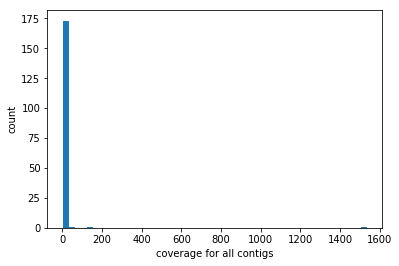

In [37]:
import matplotlib.pyplot as plt
plt.hist(cov[:len(cov)], 50)
plt.xlabel('coverage for all contigs')
plt.ylabel('count')
plt.show()

The plot shows that almost all contigs have the same amount of coverage.

## Identify the taxon from which your genome originated

1) Use **rna_hmm3.py** to scan over the entire genome to locate copies of the 16S ribosomal RNA gene.    

**rna_hmm3.py -i spades_output/contigs.fasta -o hmm_output.gff**   
input: contigs.fasta      
output: hmm_output.gff (an annotation file)

2) Use **bedtools getfasta** to extract the 16S rRNA genes from your assembly.           

**bedtools getfasta -fi spades_output/contigs.fasta -bed hmm_output.gff -fo bedtools_output.fasta**     
input1: contigs.fasta     
input2: hmm_output.gff     
output: bedtools_output.fasta


3) Use **Ribosomal Database Project’s SeqMatch tool** to tompare these genes to a database of known 16S rRNA genes.   
Write down your genus-level identification along with an explanation for how you came to this conclusion.

The genus-level result is Pseudomonas. I got this conclusion because almost all results of the query sesquences show Pseudomonas with similar S_ab scores.

## Genome annotation

*Upload contigs.fasta to two remote annotation services that will perform the annotation automatically: RAST and BASys*

According to the result from BAsys Annotation Summary (Fig.1), the bacterium has RNA16s genome length of 414,009bp, with 444 genes total, with approx. 59% GC content (29% G and 30% C). The bacterium’s protein location shows it has cell structures like spore core membrane, integral membrane, cell inner membrane, cytoplasm, etc. The bacterium also has genes that encode proteins and functional RNA and is able to store and process information, perform cellular processes (such as moving and signaling), and perform metabolism. 

The annotation result done by RAST (Fig.2) provides similar results of the bacterium’s cell features. The subsystem information shows 71% of the genome, which is composed of CDS, repeat, and RNA, is not in subsystem of the bacterium. RAST was not able to identify the bacterium at species level (indicated by the name Pseudomonas sp.), but it has found the bacterium’s closest neighbors. The top three closest neighbors are: Pseudomonas fluorescens PfO-1 (scored 548), Pseudomonas syringae pv. phaseolicola 1448A (scored 485), and Pseudomonas putida KT2440 (scored 484). The “amino acids and derivatives” result does not show any isoleucine and valine biosynthesis functions, indicating that the bacterium is auxotrophic for these proteins. It’s closest neighbor, Pseudomonas fluorescens PfO-1, is also auxotrophic isoleucine and valine. 
The genome encodes Toxin higB-2 [H] and Multiple antibiotic resistance protein marR [H]. The multiple antibiotic resistance protein marR [H] implies the existence of its antibiotic resistant gene. I expect the bacterium to be susceptible to penicillin. Penicillin acrylates the active site of D-alanine carboxypeptidase which is also found in the bacterium we are analyzing. 

Pseudomonas tend to reside at warm, humid, and nutritious environment. A study shows that the changes of mRNA and proteins in Pseudomonas aeruginosa are environmental-driven (Erdamnn J, et.al). The researchers use LC-MS techniques to compare the RNA-to-protein ratios for each individual gene and explore the relationship between the differentiated mRNA and the correlated environmental conditions. They have successfully observed the condition-dependent post-transcriptional regulatory events in the complex mRNA-to-protein processes. 

The “rapid diversification of Pseudomonas aeruginosa in cystic fibrosis lung-like conditions” is also shows that the bacterium’s ability to diversify rapidly which is the leading cause of morbidity and mortality for adult cystic fibrosis patients, therefore it is considered a human pathogen (Castledine M, et.al). The unique conditions of the cystic fibrosis airway and lung environment induces “rapid and extensive diversification of P.aeruginosa Mucin, the substance responsible for increased viscosity” which can “promote divergence among population”. Therefore, the bacterium would be considered a human pathogen.

**References**
1. Erdmann, J., Preusse, M., Khaledi, A., Pich, A., & Häussler, S. (n.d.). Environment-driven changes of mRNA and protein levels in Pseudomonas aeruginosa. Retrieved from https://www.ncbi.nlm.nih.gov/pubmed/30346651

2. Schick, A., & Kassen, R. (2018, October 16). Rapid diversification of Pseudomonas aeruginosa in cystic fibrosis lung-like conditions. Retrieved from https://www.ncbi.nlm.nih.gov/pubmed/30275334 




Figure 1
![figure1](1.png)

Figure 2
![figure2](2.png)